## Analysis 1
### Show the general geo-location of the H1-B visa opportunities

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
file = pd.read_csv('data/h1b_kaggle.csv',dtype='unicode') #C:\\Users\\Alex\\Desktop\\data\\h1b_kaggle.csv
df = pd.DataFrame(file)
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067,2016,"ANN ARBOR, MICHIGAN",-83.7430378,42.2808256
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674,2016,"PLANO, TEXAS",-96.6988856,33.0198431
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066,2016,"JERSEY CITY, NEW JERSEY",-74.0776417,40.7281575
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314,2016,"DENVER, COLORADO",-104.990251,39.7392358
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016,"ST. LOUIS, MISSOURI",-90.1994042,38.6270025


In [3]:
df.shape

(3002458, 11)

In [4]:
df_nan_drop = df.dropna(0,how='any')
df_nan_drop.shape

(2877765, 11)

In [5]:
df_step1 = df_nan_drop.drop(df.columns[0], axis=1)    #drop first column with the old index
df_step1.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067,2016,"ANN ARBOR, MICHIGAN",-83.7430378,42.2808256
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674,2016,"PLANO, TEXAS",-96.6988856,33.0198431
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066,2016,"JERSEY CITY, NEW JERSEY",-74.0776417,40.7281575
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314,2016,"DENVER, COLORADO",-104.990251,39.7392358
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016,"ST. LOUIS, MISSOURI",-90.1994042,38.6270025


In [6]:
coords = df_step1.as_matrix(columns=['lat', 'lon'])   #select the latitude and longitude 
coords[:20]

array([['42.2808256', '-83.7430378'],
       ['33.0198431', '-96.6988856'],
       ['40.7281575', '-74.0776417'],
       ['39.7392358', '-104.990251'],
       ['38.6270025', '-90.1994042'],
       ['25.7616798', '-80.1917902'],
       ['29.7604267', '-95.3698028'],
       ['37.3382082', '-121.8863286'],
       ['38.9012225', '-77.2652604'],
       ['40.4406248', '-79.9958864'],
       ['43.6155825', '-84.2472116'],
       ['25.7616798', '-80.1917902'],
       ['39.6172101', '-104.9508141'],
       ['39.0066993', '-77.4291298'],
       ['43.0116784', '-88.2314813'],
       ['34.0522342', '-118.2436849'],
       ['37.3541079', '-121.9552356'],
       ['38.8048355', '-77.0469214'],
       ['34.0005691', '-118.1597929'],
       ['34.0522342', '-118.2436849']], dtype=object)

In [7]:
m = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64,
      urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
      lon_0=-95, resolution='h', area_thresh=10000)

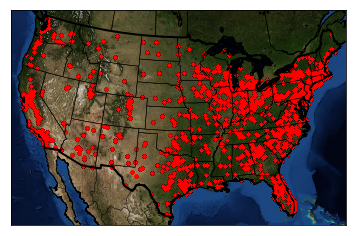

In [8]:
m.bluemarble()
m.drawcoastlines()
# draw country boundaries
m.drawcountries(linewidth=2)
# draw states boundaries (America only)
m.drawstates()
x, y = m(coords[:, 1], coords[:, 0])
m.scatter(x,y,5,marker='o',color='r')
plt.show()

## Analysis 2
### Find the top 10 states with the most HI-B visa opportunities by year

In [9]:
df_step2 = pd.DataFrame(df_step1['WORKSITE'].str.split(', ',1).tolist(), columns = ['CITY','STATE'])
df_step2.head()                                                                                           #split city and state

,CITY,STATE
0,ANN ARBOR,MICHIGAN
1,PLANO,TEXAS
2,JERSEY CITY,NEW JERSEY
3,DENVER,COLORADO
4,ST. LOUIS,MISSOURI


In [10]:
df_step3 = pd.merge(df_step1, df_step2, left_index = True, right_index = True)        #merge city and state to dataframe
df_step3.head()                                                                

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,CITY,STATE
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067,2016,"ANN ARBOR, MICHIGAN",-83.7430378,42.2808256,ANN ARBOR,MICHIGAN
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674,2016,"PLANO, TEXAS",-96.6988856,33.0198431,PLANO,TEXAS
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066,2016,"JERSEY CITY, NEW JERSEY",-74.0776417,40.7281575,JERSEY CITY,NEW JERSEY
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314,2016,"DENVER, COLORADO",-104.990251,39.7392358,DENVER,COLORADO
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016,"ST. LOUIS, MISSOURI",-90.1994042,38.6270025,ST. LOUIS,MISSOURI


In [11]:
df_groupby_year_state = pd.DataFrame(df_step3.groupby(['YEAR','STATE']).size())
df_groupby_year_state.columns = ['COUNT']
df_groupby_year_state.head()                                   #group by year and state

COUNT
YEAR STATE            
2011 ALABAMA       755
     ALASKA         96
     ARIZONA      2563
     ARKANSAS      922
     CALIFORNIA  40730

In [12]:
df_groupby_year_state = df_groupby_year_state.groupby(level=0, group_keys=False)
df_result = df_groupby_year_state.apply(lambda x: x.sort_values('COUNT',ascending=False).head(10))
df_result.head()                   #sort data within state group

COUNT
YEAR STATE            
2011 CALIFORNIA  40730
     NEW YORK    25846
     TEXAS       19599
     NEW JERSEY  14256
     ILLINOIS    11290

In [13]:
df_result.reset_index(level=1, inplace=True)  #convert index to column
df_result.head()

,STATE,COUNT
YEAR,,
2011,CALIFORNIA,40730
2011,NEW YORK,25846
2011,TEXAS,19599
2011,NEW JERSEY,14256
2011,ILLINOIS,11290


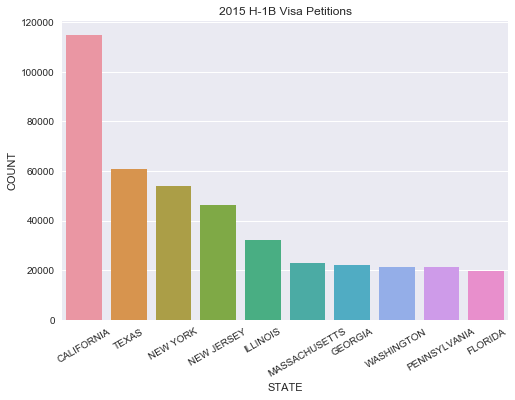

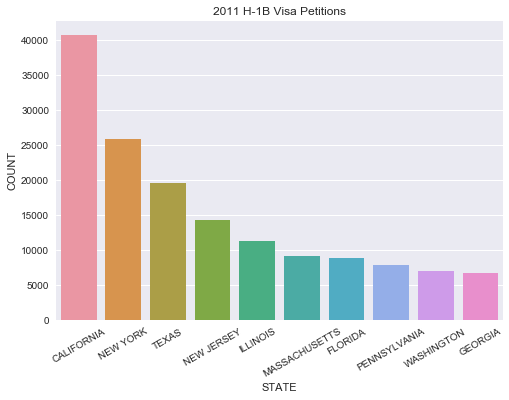

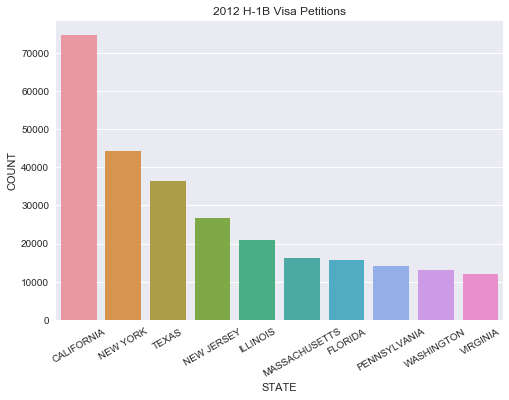

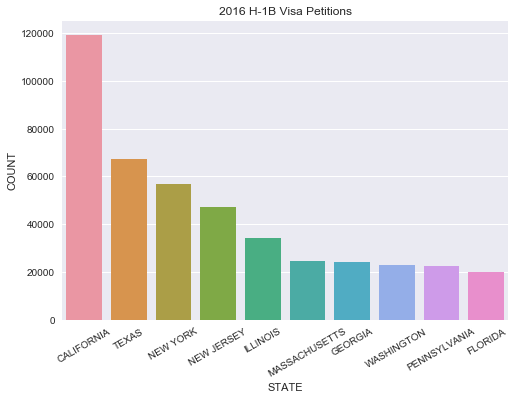

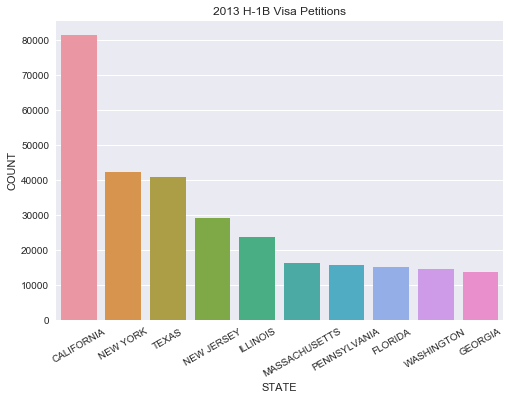

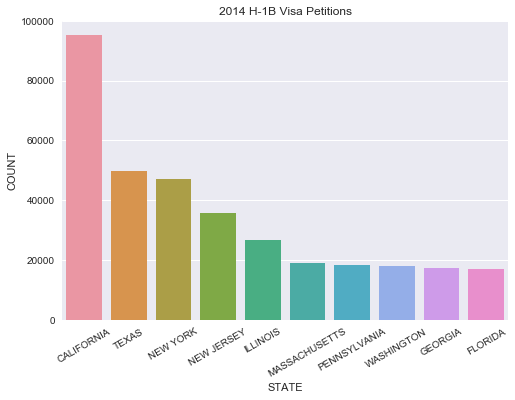

In [16]:
years = set(df_result.index.get_level_values('YEAR'))
for year in years:
    ax = sns.barplot(x='STATE', y="COUNT", data=df_result.loc[year])
    for label in ax.get_xticklabels():
        label.set_rotation(30)
    plt.ylabel('COUNT')
    plt.title(str(year) + ' H-1B Visa Petitions')
    plt.show()

In [73]:
df_result.to_csv("data/ana_2.csv")  #write to csv

## Analysis 3
### Filter data further, locate data in top 5 states, full time position, specify CASE_STATUS as "CERTIFIED", and top 20% of cities and occupations

In [15]:
from matplotlib.pyplot import pie, axis, show
import matplotlib as mpl
import seaborn as sns

In [17]:
df_top5_state = df_step3.loc[df_step3['STATE'].isin(['CALIFORNIA','TEXAS','NEW YORK','NEW JERSEY','ILLINOIS'])]
df_top5_state.shape       #select data form top 5 states

(1419677, 12)

In [18]:
set(df_top5_state['CASE_STATUS'])

{'CERTIFIED',
 'CERTIFIED-WITHDRAWN',
 'DENIED',
 'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED',
 'WITHDRAWN'}

In [19]:
df_top5_state.groupby('CASE_STATUS').size()

CASE_STATUS
CERTIFIED                                             1240511
CERTIFIED-WITHDRAWN                                     98140
DENIED                                                  39077
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED          4
WITHDRAWN                                               41945
dtype: int64

In [20]:
df_status = df_top5_state.groupby('CASE_STATUS').size().sort_values(ascending=False).head(4)  #select 4 main status

In [21]:
df_status_values = list(df_status.values)
df_status_values

[1240511, 98140, 41945, 39077]

In [22]:
df_status_labels = list(df_status.index.values)
df_status_labels

['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'DENIED']

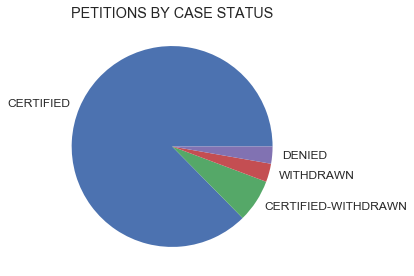

In [23]:
sns.set_context("notebook",font_scale=1.2)
plt.figure(figsize=(4.5,4.5))
plt.title('PETITIONS BY CASE STATUS')
axis('equal');
pie(df_status_values, labels=df_status_labels);
show()

### As the pie chart _PETITIONS BY CASE STATUS_ demostrates, most of the cases are certified, furthermore, only _CERITIFIED_ cases make the most sense to foreign candidates.

In [24]:
df_top5_state = df_top5_state.loc[df_step3['CASE_STATUS'] == 'CERTIFIED']  #select 'CERTIFIED' status which makes the most sense

In [25]:
df_top5_state.groupby('FULL_TIME_POSITION').size()   #most of the job positions are full time position

FULL_TIME_POSITION
N     181375
Y    1059136
dtype: int64

In [26]:
df_top5_state = df_top5_state.loc[df_step3['FULL_TIME_POSITION'] == 'Y'] #select the full time position jobs to dig into deeper

In [27]:
df_top5_state.shape

(1059136, 12)

In [28]:
df_top5_state.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,CITY,STATE
18,CERTIFIED,QUICKLOGIX LLC,CHIEF EXECUTIVES,CEO,Y,187200,2016,"SANTA CLARA, CALIFORNIA",-121.9552356,37.3541079,COMMERCE,CALIFORNIA
19,CERTIFIED,"MCCHRYSTAL GROUP, LLC",CHIEF EXECUTIVES,"PRESIDENT, NORTHEAST REGION",Y,241842,2016,"ALEXANDRIA, VIRGINIA",-77.0469214,38.8048355,LOS ANGELES,CALIFORNIA
23,CERTIFIED,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,Y,99986,2016,"CHULA VISTA, CALIFORNIA",-117.0841955,32.6400541,SANTA CLARA,CALIFORNIA
25,CERTIFIED,"QUICKLOGIX, INC.",CHIEF EXECUTIVES,CEO,Y,187200,2016,"SANTA CLARA, CALIFORNIA",-121.9552356,37.3541079,SAN FRANCISCO,CALIFORNIA
29,CERTIFIED,"PERSPECTIVES OF FREEDOM FOUNDATION, INC",CHIEF EXECUTIVES,EXECUTIVE DIRECTOR,Y,95295.98,2016,"WESTON, FLORIDA",-80.3997748,26.1003654,CHICAGO,ILLINOIS


### For further data cleaning purpose and improving analysis effeciency, according to Zipf's law that 20% always contributes 80%. I will locate the dataset into top 20% of cities and top 20% of the occupations(SOC_NAME).

In [29]:
def locate_top(df,column_name):                            #function to filter dataframe
    size = len(set(df[column_name]))                       #caculate unique list
    df_group = df.groupby(column_name).size()       
    df_top = df_group.sort_values(ascending=False).head(int(size*0.2))   #select top %20
    top_list = list(df_top.index.values)                  #generate top %20 list
    df_top = df.loc[df[column_name].isin(top_list)]      #filter the data
    return df_top

In [30]:
df_top_city = locate_top(df_top5_state,'CITY')
df_top_city.shape

(921510, 12)

In [31]:
df_top_SOC = locate_top(df_top_city,'SOC_NAME')
df_top_SOC.shape

(894943, 12)

In [32]:
df_top_SOC.to_csv("data/ana_3.csv",index=False)

## Analysis 4
### Anaylsis average wages within every year

In [33]:
df_top_SOC['PREVAILING_WAGE'].dtypes

dtype('O')

In [56]:
df_top_SOC['PREVAILING_WAGE'] = pd.to_numeric(df_top_SOC['PREVAILING_WAGE']) #convert wage into float format

In [35]:
df_top_SOC['PREVAILING_WAGE'].dtypes

dtype('float64')

In [36]:
df_mean_wage = pd.DataFrame(df_top_SOC.groupby(['STATE','YEAR'])['PREVAILING_WAGE'].mean())
df_mean_wage.columns = ['AVERAGE_WAGE']
df_mean_wage.head()

AVERAGE_WAGE
STATE      YEAR              
CALIFORNIA 2011  85121.696385
           2012  68718.428169
           2013  70320.417426
           2014  71165.794238
           2015  72966.366930

In [37]:
df_mean_wage.reset_index(level=0, inplace=True)
df_mean_wage.head()

,STATE,AVERAGE_WAGE
YEAR,,
2011,CALIFORNIA,85121.696385
2012,CALIFORNIA,68718.428169
2013,CALIFORNIA,70320.417426
2014,CALIFORNIA,71165.794238
2015,CALIFORNIA,72966.366930


In [38]:
df_mean_wage.reset_index(level=0, inplace=True)   #convert index to column for plot
df_mean_wage.head()

,YEAR,STATE,AVERAGE_WAGE
0,2011,CALIFORNIA,85121.696385
1,2012,CALIFORNIA,68718.428169
2,2013,CALIFORNIA,70320.417426
3,2014,CALIFORNIA,71165.794238
4,2015,CALIFORNIA,72966.366930


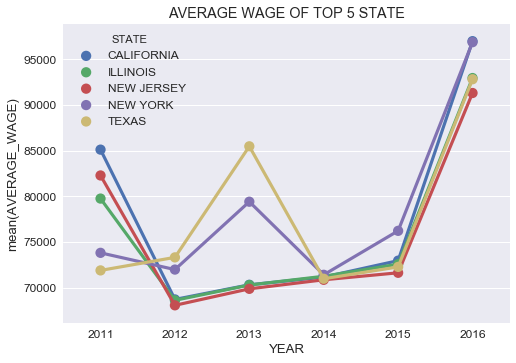

In [50]:
sns.pointplot(x='YEAR', y="AVERAGE_WAGE", hue='STATE', data=df_mean_wage);
plt.title('AVERAGE WAGE OF TOP 5 STATE')
show()

In [40]:
df_mean_wage.to_csv('data/ana_4.csv',index=False)

## Analysis 5
### Analysis of top 10 employers ,top 20 job titles and the relation with average wages.

In [42]:
def locate_top_n(df,column_name,size):                            #function to filter dataframe          
    df_group = df.groupby(column_name).size()
    df_top = df_group.sort_values(ascending=False).head(size)   #select top n
    top_list = list(df_top.index.values)                  #generate top %20 list
    df_top = df.loc[df[column_name].isin(top_list)]      #filter the data
    return df_top

In [43]:
df_top_employer = locate_top_n(df_top_SOC,'EMPLOYER_NAME',10)     #select top 10 employers
df_top_employer.shape

(157658, 12)

In [44]:
df_top_employer.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,CITY,STATE
1003,CERTIFIED,MICROSOFT CORPORATION,GENERAL AND OPERATIONS MANAGERS,"CORPORATE VICE PRESIDENT, CUSTOMER SERVICE AND...",Y,162989.0,2016,"REDMOND, WASHINGTON",-122.121512,47.6739881,NORTHBROOK,ILLINOIS
1473,CERTIFIED,WIPRO LIMITED,GENERAL AND OPERATIONS MANAGERS,ACCOUNT DELIVERY HEAD,Y,106475.0,2016,"LINCOLN, NEBRASKA",-96.6851982,40.8257625,LOS ANGELES,CALIFORNIA
1679,CERTIFIED,DELOITTE CONSULTING LLP,GENERAL AND OPERATIONS MANAGERS,MANAGER,Y,113318.0,2016,"MINNEAPOLIS, MINNESOTA",-93.2650108,44.977753,EL PASO,TEXAS
1705,CERTIFIED,WIPRO LIMITED,GENERAL AND OPERATIONS MANAGERS,ACCOUNT DELIVERY HEAD,Y,144893.0,2016,"LEXINGTON, MASSACHUSETTS",-71.2289641,42.4430372,HOUSTON,TEXAS
1792,CERTIFIED,DELOITTE CONSULTING LLP,GENERAL AND OPERATIONS MANAGERS,MANAGER,Y,139256.0,2016,"GRAND RAPIDS, MICHIGAN",-85.6680863,42.9633599,HOUSTON,TEXAS


In [45]:
df_top_employer_year = pd.DataFrame(df_top_employer.groupby(['EMPLOYER_NAME','YEAR']).size())
df_top_employer_year.columns = ['COUNT']
df_top_employer_year.head()

COUNT
EMPLOYER_NAME YEAR       
ACCENTURE LLP 2011    295
              2012   1143
              2013   2198
              2014   2469
              2015   4123

In [46]:
df_top_employer_year.reset_index(level=0, inplace=True)

In [47]:
df_top_employer_year.reset_index(level=0, inplace=True)
df_top_employer_year.head()

,YEAR,EMPLOYER_NAME,COUNT
0,2011,ACCENTURE LLP,295
1,2012,ACCENTURE LLP,1143
2,2013,ACCENTURE LLP,2198
3,2014,ACCENTURE LLP,2469
4,2015,ACCENTURE LLP,4123


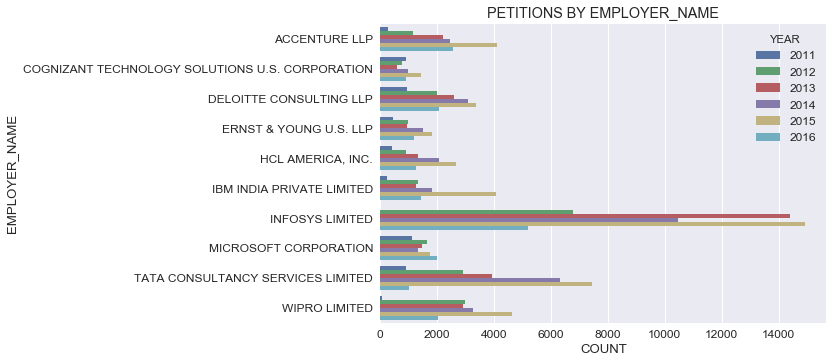

In [49]:
sns.barplot(x="COUNT", y="EMPLOYER_NAME", hue="YEAR", data=df_top_employer_year)
plt.title('PETITIONS BY EMPLOYER_NAME')
plt.xlabel('COUNT')
plt.show()

In [58]:
df_top_employer_year.to_csv('data/ana_5_1.csv',index=False)

In [52]:
df_top_employer_job = locate_top_n(df_top_employer,'JOB_TITLE',20) #select top 20 job titles

In [53]:
df_top_job_wage = pd.DataFrame(df_top_employer_job.groupby('JOB_TITLE')['PREVAILING_WAGE'].mean())
df_top_job_wage.head()

,PREVAILING_WAGE
JOB_TITLE,
ADVISORY SENIOR,73448.821855
COMPUTER PROGRAMMER,61147.030735
COMPUTER PROGRAMMER/CONFIGURER 2,68103.902370
CONSULTANT,65237.921999
CONSULTANT - US,73380.053561


In [54]:
df_top_job_wage.reset_index(level=0, inplace=True)
df_top_job_wage.head()

,JOB_TITLE,PREVAILING_WAGE
0,ADVISORY SENIOR,73448.821855
1,COMPUTER PROGRAMMER,61147.030735
2,COMPUTER PROGRAMMER/CONFIGURER 2,68103.902370
3,CONSULTANT,65237.921999
4,CONSULTANT - US,73380.053561


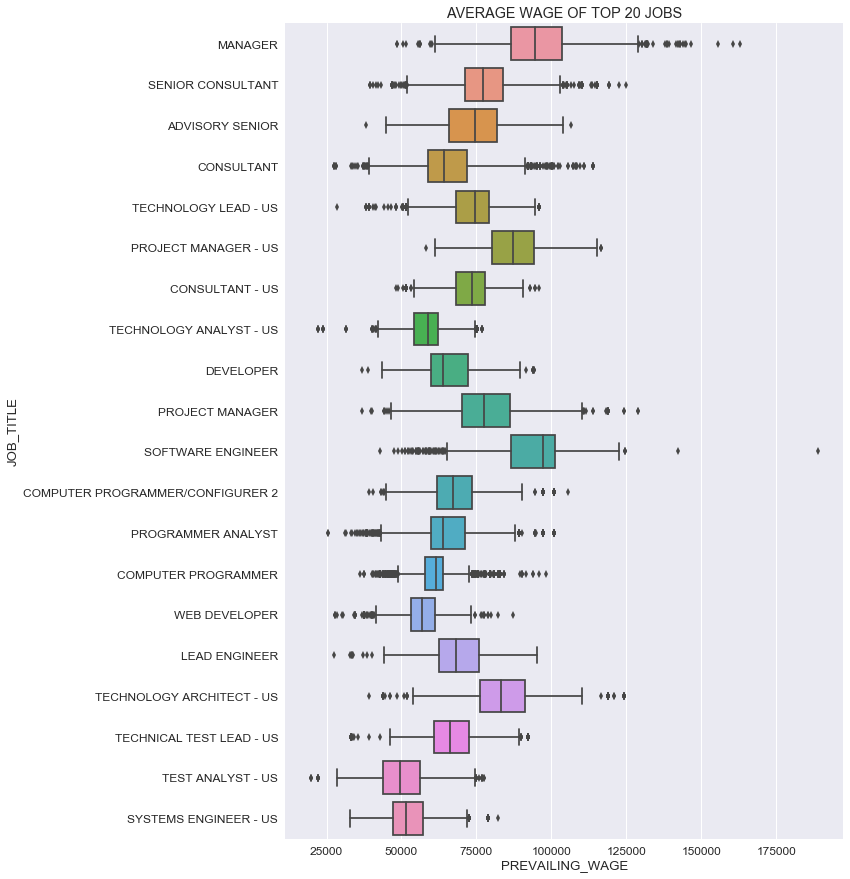

In [57]:
ax = sns.boxplot(x="PREVAILING_WAGE", y="JOB_TITLE", data=df_top_employer_job)
plt.rcParams['figure.figsize']=(10,15)
plt.title('AVERAGE WAGE OF TOP 20 JOBS')
plt.show()

In [60]:
df_top_job_wage.to_csv('data/ana_5_2.csv',index=False)